In [82]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib import rc
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [33]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp'], index_col='timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [34]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [35]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.day_of_week
df['day_of_month'] = df.index.day
df['month'] = df.index.month


In [36]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

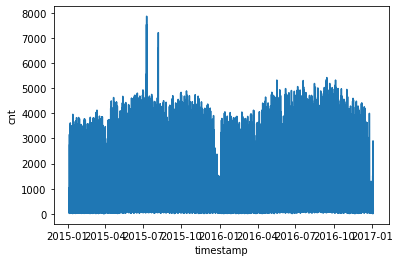

In [37]:
sns.lineplot(x=df.index, y='cnt', data = df)

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

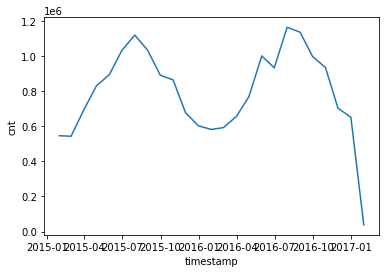

In [38]:
df_by_month = df.resample('M').sum()
sns.lineplot(x=df_by_month.index, y='cnt', data = df_by_month)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

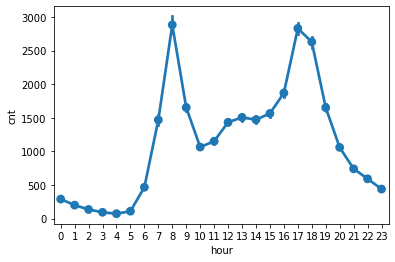

In [39]:
sns.pointplot(data=df, x='hour', y='cnt')

<AxesSubplot:xlabel='hour', ylabel='cnt'>

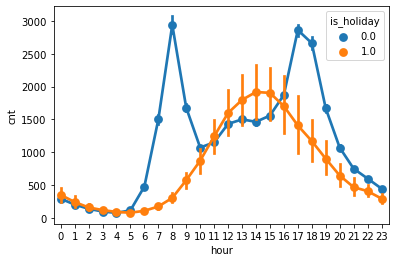

In [40]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday')

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

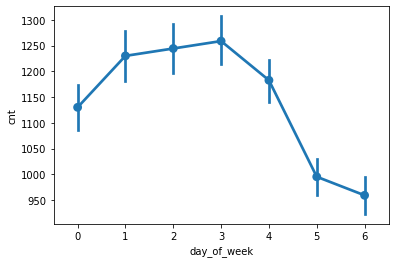

In [41]:
sns.pointplot(data=df, x='day_of_week', y='cnt')

## implement model

In [42]:
train_size = int(len(df) * 0.9)
test_size = len(df)- train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train.shape, test.shape)

(15672, 13) (1742, 13)


### 1-preprocess data

In [50]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_tranfromation = RobustScaler()
cnt_transformation = RobustScaler()

f_tranfromation= f_tranfromation.fit(train[f_columns].to_numpy())
cnt_transformation = cnt_transformation.fit(train[['cnt']])

train.loc[:, f_columns] = f_tranfromation.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformation.transform(train[['cnt']])

### test data
f_tranfromation= f_tranfromation.fit(test[f_columns].to_numpy())
cnt_transformation = cnt_transformation.fit(test[['cnt']])

test.loc[:, f_columns] = f_tranfromation.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformation.transform(test[['cnt']])  

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-50-4eb0ad8cfd07>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = cnt_transformation.transform(train[['cnt']])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [59]:
def create_dataset(X, y, timestamp):
    Xs, Ys = [], []
    for i in range(len(X)-timestamp):
        Xs.append(X.iloc[i: (i+ timestamp)].to_numpy())
        Ys.append(y.iloc[i+ timestamp])
    return np.array(Xs), np.array(Ys)

In [60]:
TIME_STAMP = 24 #base 24hr befor predict next hour

x_train, y_train = create_dataset(train, train.cnt, timestamp=TIME_STAMP)
x_test, y_test = create_dataset(test, test.cnt, timestamp=TIME_STAMP)

In [62]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15648, 24, 13) (15648,) (1718, 24, 13) (1718,)


we have 15648 sample and 24 is timestamp and 13 is feature

In [70]:
model=keras.Sequential([
    keras.layers.LSTM(550,kernel_regularizer=keras.regularizers.l1(0.00001),
                     input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True,activation='tanh'),
    keras.layers.LSTM(400,return_sequences=True,activation='tanh'),
    keras.layers.LSTM(300,kernel_regularizer=keras.regularizers.l2(0.00001),return_sequences=True,activation='tanh'),
    keras.layers.LSTM(200,kernel_regularizer=keras.regularizers.l2(0.001),return_sequences=False,activation='tanh'),

    keras.layers.Dense(100,activation='tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(50,activation='tanh'),
    keras.layers.Dense(1)
    
])



In [71]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [72]:
history =  model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.1,
    shuffle = False
)  

Epoch 1/20
441/441 [==============================] - 201s 446ms/step - loss: 0.5991 - val_loss: 0.6436
Epoch 2/20
441/441 [==============================] - 192s 436ms/step - loss: 0.3045 - val_loss: 0.3863
Epoch 3/20
441/441 [==============================] - 194s 440ms/step - loss: 0.1873 - val_loss: 0.2597
Epoch 4/20
441/441 [==============================] - 200s 454ms/step - loss: 0.1531 - val_loss: 0.2251
Epoch 5/20
441/441 [==============================] - 194s 439ms/step - loss: 0.1501 - val_loss: 0.1796
Epoch 6/20
441/441 [==============================] - 197s 447ms/step - loss: 0.1205 - val_loss: 0.2221
Epoch 7/20
441/441 [==============================] - 201s 456ms/step - loss: 0.1144 - val_loss: 0.1439
Epoch 8/20
441/441 [==============================] - 194s 440ms/step - loss: 0.1015 - val_loss: 0.1110
Epoch 9/20
441/441 [==============================] - 194s 440ms/step - loss: 0.0778 - val_loss: 0.0702
Epoch 10/20
441/441 [==============================] - 194s 440m

In [78]:
model1 = keras.Sequential()
model1.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
model1.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units = 128,
            input_shape = (x_train.shape[1],x_train.shape[2])
        )
    )
)
model1.add(keras.layers.Dropout(rate = 0.2))
model1.add(keras.layers.Dense(1))

In [79]:
model1.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [80]:
history =  model1.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.1,
    shuffle = False
)  

Epoch 1/20
441/441 [==============================] - 10s 16ms/step - loss: 0.2974 - val_loss: 0.2168
Epoch 2/20
441/441 [==============================] - 7s 15ms/step - loss: 0.1216 - val_loss: 0.0684
Epoch 3/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0629 - val_loss: 0.0500
Epoch 4/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0491 - val_loss: 0.0465
Epoch 5/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0403 - val_loss: 0.0429
Epoch 6/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0334 - val_loss: 0.0331
Epoch 7/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0279 - val_loss: 0.0344
Epoch 8/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0255 - val_loss: 0.0325
Epoch 9/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0236 - val_loss: 0.0317
Epoch 10/20
441/441 [==============================] - 7s 15ms/step - loss: 0.0228 - val_l

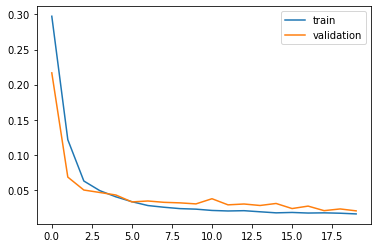

In [83]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.legend()

In [84]:
y_pred = model1.predict(x_test)

In [85]:
y_test_inv = cnt_transformation.inverse_transform(y_train.reshape(1, -1))
y_train_inv = cnt_transformation.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformation.inverse_transform(y_pred)

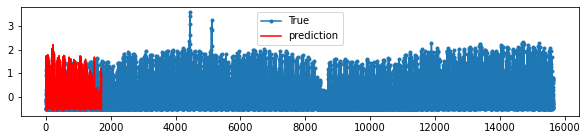

In [98]:
plt.plot(y_test_inv.flatten(), marker='.', label='True')
plt.plot(y_pred_inv.flatten(), 'r', label='prediction')
plt.rcParams["figure.figsize"] = (20,2)
plt.legend()

In [103]:
y_test[0: 10]

array([2.93279389, 1.21105866, 0.22027422, 0.21757698, 0.41087885,
       0.51337379, 0.47651158, 0.51786918, 0.97550011, 2.77095977])

In [102]:
y_pred[0: 10]

array([[2.221907  ],
       [1.1507758 ],
       [0.33309576],
       [0.19538072],
       [0.4788674 ],
       [0.5175414 ],
       [0.5035876 ],
       [0.54219615],
       [0.7319092 ],
       [1.9731963 ]], dtype=float32)

In [118]:
model2 = keras.Sequential()
model2.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          padding="causal",
                          activation="relu")
)
model2.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units = 128,
            input_shape = (x_train.shape[1],x_train.shape[2])
        )
    )
)
model2.add(keras.layers.Dropout(rate = 0.2))
model2.add(keras.layers.Dense(1))

In [109]:
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [110]:
history2 =  model1.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.1,
    shuffle = False
)  

Epoch 1/20
441/441 [==============================] - 8s 16ms/step - loss: 0.0160 - val_loss: 0.0215
Epoch 2/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0179 - val_loss: 0.0204
Epoch 3/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0158 - val_loss: 0.0241
Epoch 4/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0150 - val_loss: 0.0193
Epoch 5/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0147 - val_loss: 0.0217
Epoch 6/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0145 - val_loss: 0.0193
Epoch 7/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0142 - val_loss: 0.0193
Epoch 8/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0137 - val_loss: 0.0189
Epoch 9/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0141 - val_loss: 0.0258
Epoch 10/20
441/441 [==============================] - 7s 16ms/step - loss: 0.0142 - val_lo